# Heart_Failure_Prediction_Project

### load the data

Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\hp\Data Science\ML Practice\Heart_Failure_Prediction_Project\heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### data cleaning

In [8]:
#drop duplicate

In [9]:
print('shape before duplicate remove :',df.shape)
df.drop_duplicates(inplace=True)
print('shape after duplicate remove :',df.shape)

shape before duplicate remove : (918, 12)
shape after duplicate remove : (918, 12)


In [10]:
#no irrelavant columns

In [11]:
#no structural error

In [12]:
#check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### classify the variables

In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
cat_col=[]
cont_col=[]
for i in df.columns:
    if df[i].nunique()>40:
        cont_col.append(i)
    else:
        cat_col.append(i)
        
print('cat_col :',cat_col)
print('cont_col :',cont_col)


cat_col : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
cont_col : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [15]:
target=['HeartDisease']
ord_col=['RestingECG']
nom_col=['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']

print('target :',target)
print('nom_col :',nom_col)
print('ord_col :',ord_col)
print('cont_col :',cont_col)

target : ['HeartDisease']
nom_col : ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']
ord_col : ['RestingECG']
cont_col : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


# EDA

### Univariate Analysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Cat Variable analysis

In [17]:
#statistical distribution for target,nom, ordinal val
for i in target:
    print('===========')
    print('Name : ',i)
    print('--------------')
    print(df[i].value_counts())

for i in nom_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    print(df[i].value_counts())
    
for i in ord_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    print(df[i].value_counts())

Name :  HeartDisease
--------------
1    508
0    410
Name: HeartDisease, dtype: int64
Name :  Sex
--------------
M    725
F    193
Name: Sex, dtype: int64
Name :  ChestPainType
--------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Name :  FastingBS
--------------
0    704
1    214
Name: FastingBS, dtype: int64
Name :  ExerciseAngina
--------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Name :  ST_Slope
--------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
Name :  RestingECG
--------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


Name :  HeartDisease
--------------


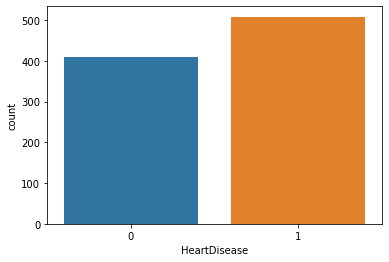

Name :  Sex
--------------


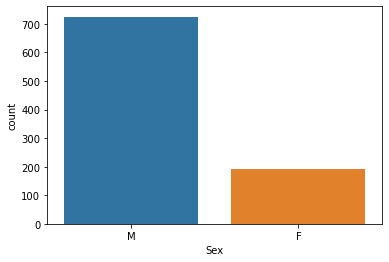

Name :  ChestPainType
--------------


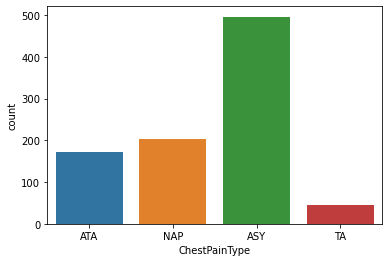

Name :  FastingBS
--------------


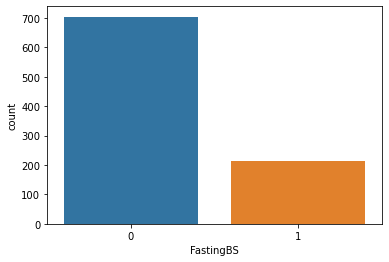

Name :  ExerciseAngina
--------------


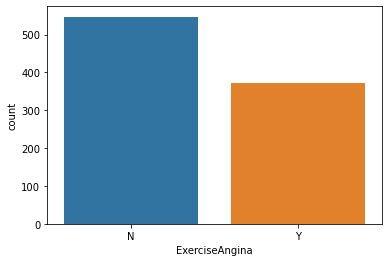

Name :  ST_Slope
--------------


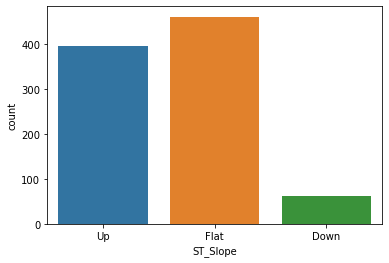

Name :  RestingECG
--------------


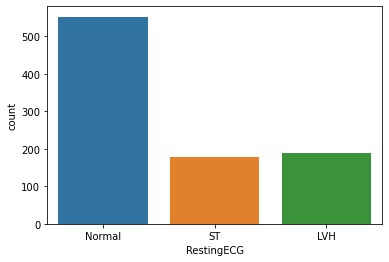

In [18]:
#visulization for target,nom, ordinal val

for i in target:
    print('===========')
    print('Name : ',i)
    print('--------------')
    sns.countplot(data=df,x=i)
    plt.show()

for i in nom_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    sns.countplot(data=df,x=i)
    plt.show()
    
for i in ord_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    sns.countplot(data=df,x=i)
    plt.show()
    


### Cont Variable analysis

#### check for distribution & skewness

Name :  Age skewness value :  -0.19593302867569365
--------------


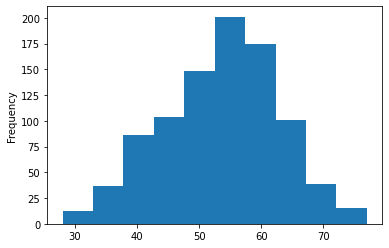

Name :  RestingBP skewness value :  0.1798393100516288
--------------


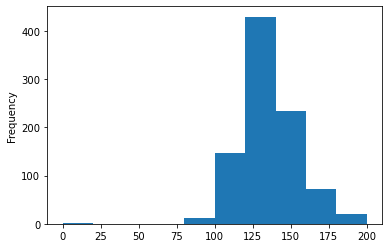

Name :  Cholesterol skewness value :  -0.6100864307268192
--------------


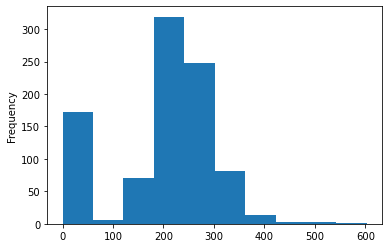

Name :  MaxHR skewness value :  -0.14435941846180994
--------------


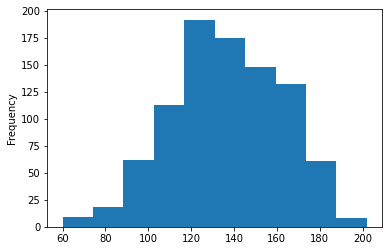

Name :  Oldpeak skewness value :  1.0228720218107528
--------------


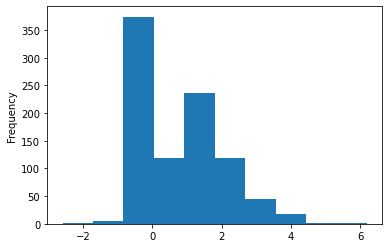

In [19]:
for i in cont_col:
    print('===========')
    print('Name : ',i,"skewness value : ",df[i].skew())
    print('--------------')
    df[i].plot(kind='hist')
    plt.show()

<AxesSubplot:>

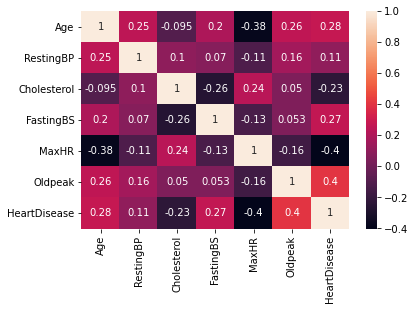

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
from scipy import stats

-0.6662633550178783


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

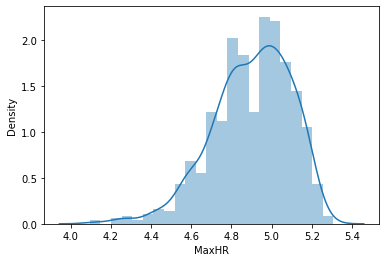

In [22]:
MaxHR_log=np.log(df['MaxHR'])
print(MaxHR_log.skew())
sns.distplot(MaxHR_log)


In [23]:
MaxHR_log

0      5.147494
1      5.049856
2      4.584967
3      4.682131
4      4.804021
         ...   
913    4.882802
914    4.948760
915    4.744932
916    5.159055
917    5.153292
Name: MaxHR, Length: 918, dtype: float64

In [24]:
df['MaxHR']=MaxHR_log

<AxesSubplot:>

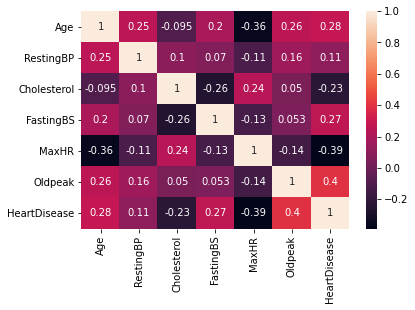

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
#conclusion: After applying log transformation on MaxHR, 
#it's corr decressing with target variable so we don't perform log transformation

Name :  Age
--------------


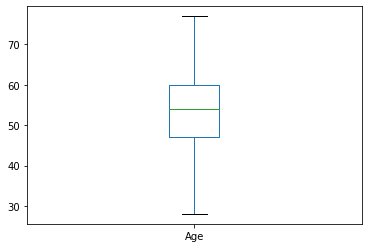

Name :  RestingBP
--------------


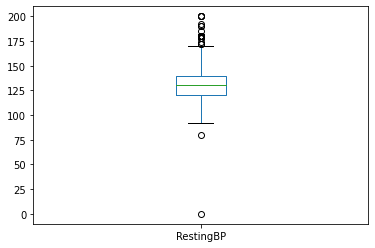

Name :  Cholesterol
--------------


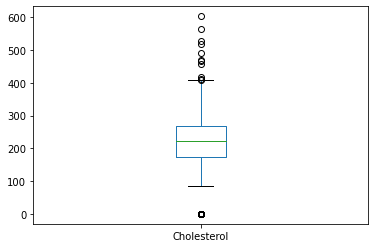

Name :  MaxHR
--------------


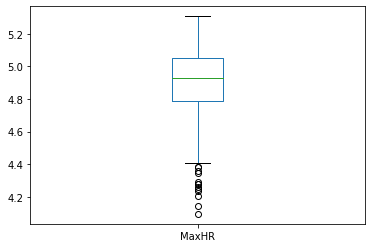

Name :  Oldpeak
--------------


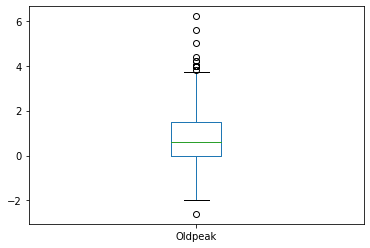

In [27]:
for i in cont_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    df[i].plot(kind='box')
    plt.show()

In [28]:
#hold on for outlier removal till evaluation

## Multivariate analysis

### cat-cont var (parallel box plot)


Name :  Age
--------------


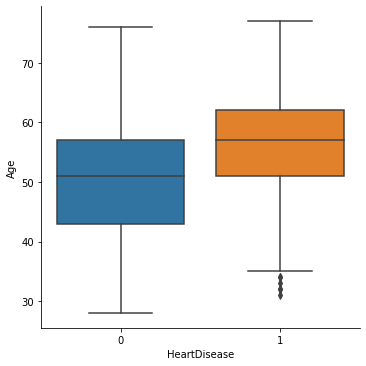

Name :  RestingBP
--------------


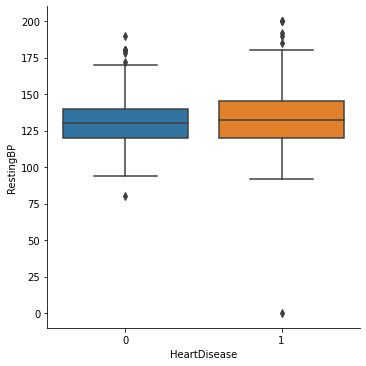

Name :  Cholesterol
--------------


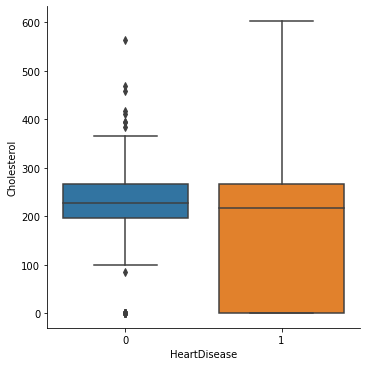

Name :  MaxHR
--------------


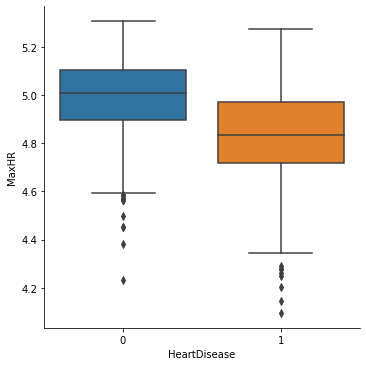

Name :  Oldpeak
--------------


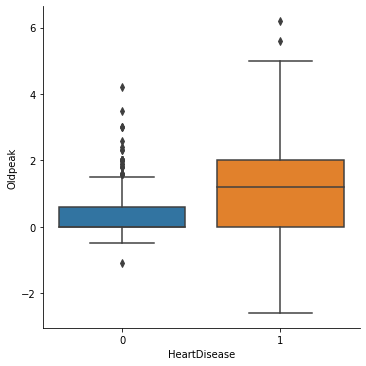

In [29]:
for i in cont_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    sns.catplot(data=df,x='HeartDisease',y=i,kind='box')
    plt.show()


In [30]:
#conclusion:
#those with Cholesterol & Oldpeak as 1(yes), have greater chance of heart problem than 0 (no)

## Cat and Cat : group bar plot

Name :  Sex
--------------


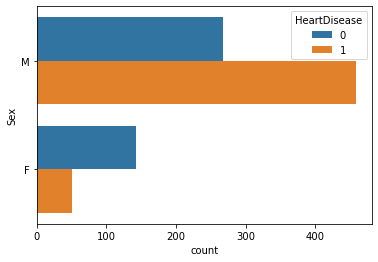

Name :  ChestPainType
--------------


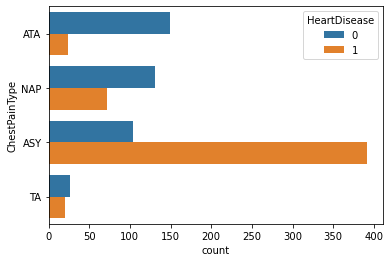

Name :  FastingBS
--------------


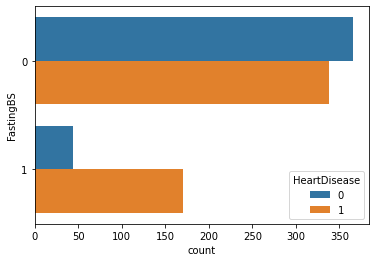

Name :  ExerciseAngina
--------------


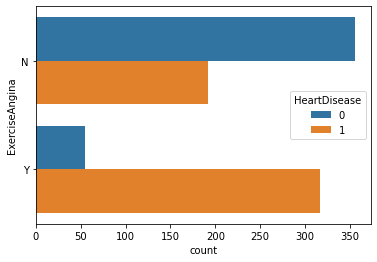

Name :  ST_Slope
--------------


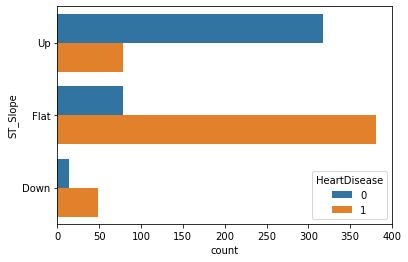

Name :  RestingECG
--------------


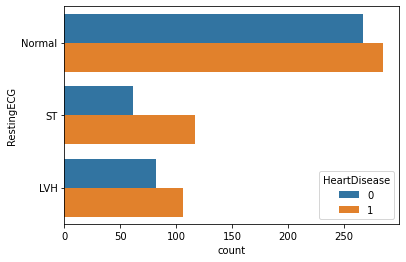

In [31]:
for i in nom_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    sns.countplot(data=df,y=i,hue='HeartDisease')
    plt.show()
    
for i in ord_col:
    print('===========')
    print('Name : ',i)
    print('--------------')
    sns.countplot(data=df,y=i,hue='HeartDisease')
    plt.show()


In [32]:
#Conclusion
#Sex : Male have high chances of heart disease than female
#ChestPainType : those with ASY have high chances of heart disease
#ExerciseAngina : those with yes have high chances of heart disease
#ST_Slope : those with flat ST_Slope have high chances of heart disease

### cont vs cont : scatter plot

In [33]:
cont_col

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

Scatter plot w.r.t Age
Name :  RestingBP
--------------


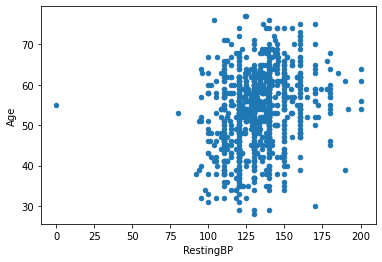

Name :  Cholesterol
--------------


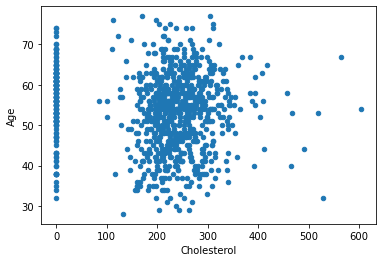

Name :  MaxHR
--------------


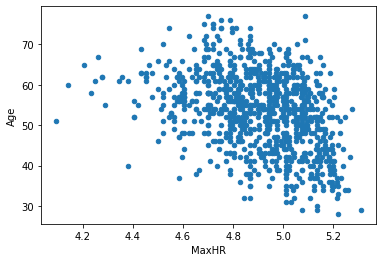

Name :  Oldpeak
--------------


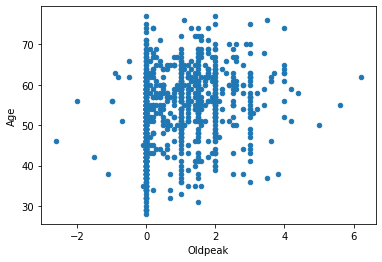

In [34]:
print('Scatter plot w.r.t Age')
for i in cont_col:
    if i=='Age':
        continue
    print('===========')
    print('Name : ',i)
    print('--------------')
    df.plot.scatter(x=i,y='Age')
    plt.show()


Scatter plot w.r.t RestingBP
Name :  Age
--------------


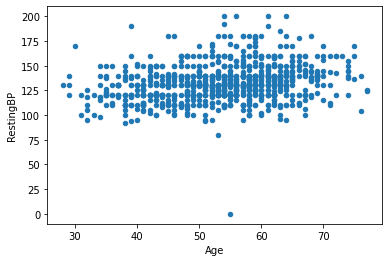

Name :  Cholesterol
--------------


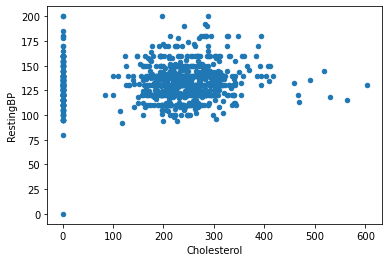

Name :  MaxHR
--------------


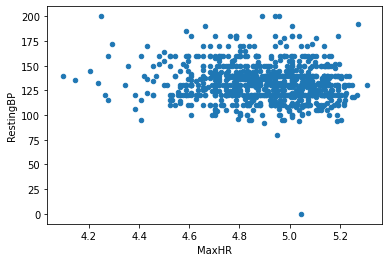

Name :  Oldpeak
--------------


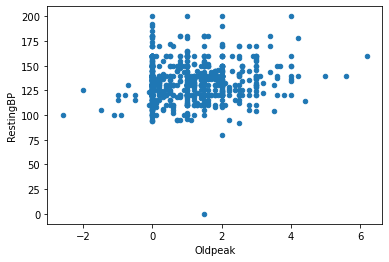

In [35]:
print('Scatter plot w.r.t RestingBP')
for i in cont_col:
    if i=='RestingBP':
        continue
    print('===========')
    print('Name : ',i)
    print('--------------')
    df.plot.scatter(x=i,y='RestingBP')
    plt.show()

Scatter plot w.r.t Cholesterol
Name :  Age
--------------


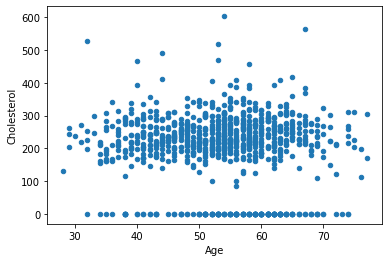

Name :  RestingBP
--------------


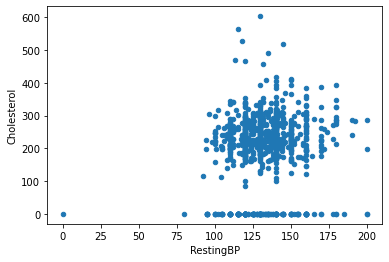

Name :  MaxHR
--------------


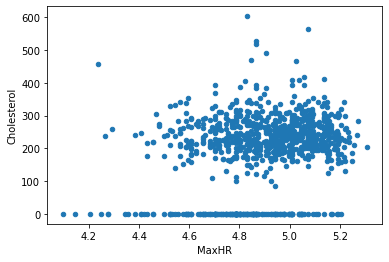

Name :  Oldpeak
--------------


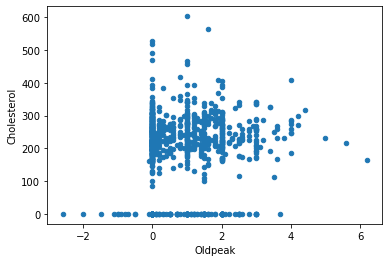

In [36]:
print('Scatter plot w.r.t Cholesterol')
for i in cont_col:
    if i=='Cholesterol':
        continue
    print('===========')
    print('Name : ',i)
    print('--------------')
    df.plot.scatter(x=i,y='Cholesterol')
    plt.show()

Scatter plot w.r.t MaxHR
Name :  Age
--------------


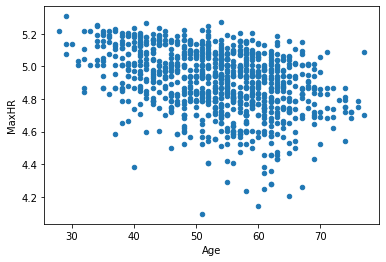

Name :  RestingBP
--------------


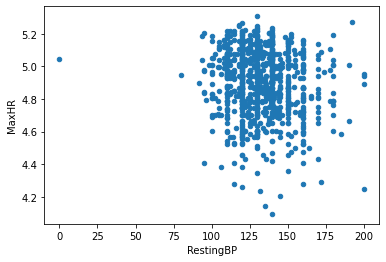

Name :  Cholesterol
--------------


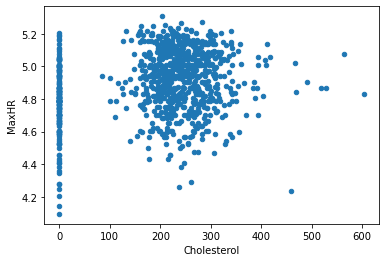

Name :  Oldpeak
--------------


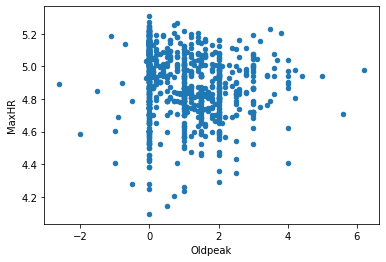

In [37]:
print('Scatter plot w.r.t MaxHR')
for i in cont_col:
    if i=='MaxHR':
        continue
    print('===========')
    print('Name : ',i)
    print('--------------')
    df.plot.scatter(x=i,y='MaxHR')
    plt.show()

Scatter plot w.r.t Oldpeak
Name :  Age
--------------


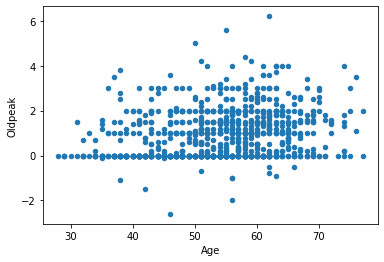

Name :  RestingBP
--------------


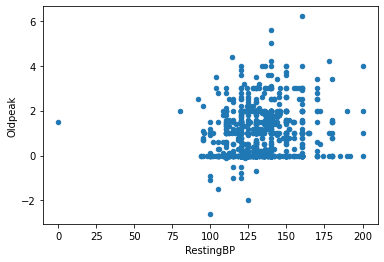

Name :  Cholesterol
--------------


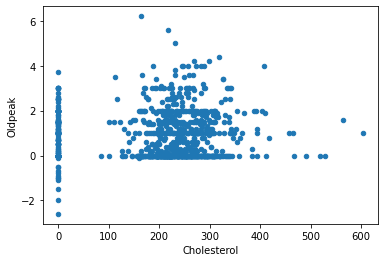

Name :  MaxHR
--------------


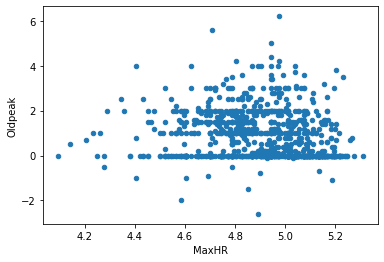

In [38]:
print('Scatter plot w.r.t Oldpeak')
for i in cont_col:
    if i=='Oldpeak':
        continue
    print('===========')
    print('Name : ',i)
    print('--------------')
    df.plot.scatter(x=i,y='Oldpeak')
    plt.show()

In [39]:
#conclusion: no such visible relation between them 

# Feature Engineer

### Feature selection

In [40]:
#use statistical test (hypothetical test)

#consider null hypothesis: feature are not corr
# p value is probability of null hypo being true

#as our target var is cat
#we perform

#chi-square test : between cat & target 
#Annova test : between cont & target

### ChiSqu Test

In [41]:
nom_col

['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']

In [42]:
#before test we need to convert to all cat col by label encoder

In [43]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['ChestPainType']= label_encoder.fit_transform(df['ChestPainType'])
df['FastingBS']= label_encoder.fit_transform(df['FastingBS'])
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope'])


In [44]:
nom_col

['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']

In [45]:
from sklearn.feature_selection import chi2
for i in nom_col:
    print('-----------------------------')
    chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df['HeartDisease']).reshape(-1, 1))
    print('Name : ',i,'p_val is :', p_val)

-----------------------------
Name :  Sex p_val is : [2.2018168e-05]
-----------------------------
Name :  ChestPainType p_val is : [7.81000905e-37]
-----------------------------
Name :  FastingBS p_val is : [1.32152556e-12]
-----------------------------
Name :  ExerciseAngina p_val is : [6.549289e-31]
-----------------------------
Name :  ST_Slope p_val is : [1.33620549e-18]


In [46]:
#conclusion: as P values for all the nom col is less than 0.05 so null hyo rejected
#alternative hypo accepted  for all cases

### Annova Test

In [47]:
cont_col

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [48]:
from scipy import stats
f,p=stats.f_oneway(df['Cholesterol'],df['MaxHR'])
print(p)

0.0


### feature Scalling

In [49]:
cont_col

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [50]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
df1=minmax.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

df2=pd.DataFrame(data=df1,columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
df2

#doining changes in main df file

df['Age']=df2['Age']
df['RestingBP']=df2['RestingBP']
df['Cholesterol']=df2['Cholesterol']
df['MaxHR']=df2['MaxHR']
df['Oldpeak']=df2['Oldpeak']
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,Normal,0.867559,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,Normal,0.787127,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,ST,0.404163,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,Normal,0.484204,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,Normal,0.584614,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,Normal,0.649512,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,Normal,0.703846,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,Normal,0.535938,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,LVH,0.877082,0,0.295455,1,1


In [51]:
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,Normal,0.867559,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,Normal,0.787127,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,ST,0.404163,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,Normal,0.484204,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,Normal,0.584614,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,Normal,0.649512,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,Normal,0.703846,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,Normal,0.535938,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,LVH,0.877082,0,0.295455,1,1


In [52]:
#labelling for Ordinal col


In [53]:
df.loc[df['RestingECG']=='Normal',['RestingECG']]=0
df.loc[df['RestingECG']=='ST',['RestingECG']]=1
df.loc[df['RestingECG']=='LVH',['RestingECG']]=2
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,0,0.867559,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,0,0.787127,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,1,0.404163,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,0,0.484204,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,0,0.584614,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,0,0.649512,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,0,0.703846,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,0,0.535938,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,2,0.877082,0,0.295455,1,1


In [54]:
#scalling of ordinal col

df1=minmax.fit_transform(df[['Age', 'RestingECG']])

df2=pd.DataFrame(data=df1,columns=['Age', 'RestingECG'])
df2

#doining changes in main df file

df['RestingECG']=df2['RestingECG']
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,0.0,0.867559,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,0.0,0.787127,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,0.5,0.404163,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,0.0,0.484204,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,0.0,0.584614,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,0.0,0.649512,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,0.0,0.703846,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,0.0,0.535938,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,1.0,0.877082,0,0.295455,1,1


In [55]:
#all cols are ready after scalling

In [56]:
#doing one encoding for nom col of unique value more than 2

df = pd.get_dummies(data=df, columns = ['ChestPainType','ST_Slope'])


In [57]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,0.244898,1,0.70,0.479270,0,0.0,0.867559,0,0.295455,0,0,1,0,0,0,0,1
1,0.428571,0,0.80,0.298507,0,0.0,0.787127,0,0.409091,1,0,0,1,0,0,1,0
2,0.183673,1,0.65,0.469320,0,0.5,0.404163,0,0.295455,0,0,1,0,0,0,0,1
3,0.408163,0,0.69,0.354892,0,0.0,0.484204,1,0.465909,1,1,0,0,0,0,1,0
4,0.530612,1,0.75,0.323383,0,0.0,0.584614,0,0.295455,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,0.55,0.437811,0,0.0,0.649512,0,0.431818,1,0,0,0,1,0,1,0
914,0.816327,1,0.72,0.320066,1,0.0,0.703846,0,0.681818,1,1,0,0,0,0,1,0
915,0.591837,1,0.65,0.217247,0,0.0,0.535938,1,0.431818,1,1,0,0,0,0,1,0
916,0.591837,0,0.65,0.391376,0,1.0,0.877082,0,0.295455,1,0,1,0,0,0,1,0


### final data is ready with all encoding and scalling


## Test Train Split

In [58]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,0.244898,1,0.70,0.479270,0,0.0,0.867559,0,0.295455,0,0,1,0,0,0,0,1
1,0.428571,0,0.80,0.298507,0,0.0,0.787127,0,0.409091,1,0,0,1,0,0,1,0
2,0.183673,1,0.65,0.469320,0,0.5,0.404163,0,0.295455,0,0,1,0,0,0,0,1
3,0.408163,0,0.69,0.354892,0,0.0,0.484204,1,0.465909,1,1,0,0,0,0,1,0
4,0.530612,1,0.75,0.323383,0,0.0,0.584614,0,0.295455,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,0.55,0.437811,0,0.0,0.649512,0,0.431818,1,0,0,0,1,0,1,0
914,0.816327,1,0.72,0.320066,1,0.0,0.703846,0,0.681818,1,1,0,0,0,0,1,0
915,0.591837,1,0.65,0.217247,0,0.0,0.535938,1,0.431818,1,1,0,0,0,0,1,0
916,0.591837,0,0.65,0.391376,0,1.0,0.877082,0,0.295455,1,0,1,0,0,0,1,0


In [59]:
y=df['HeartDisease']
x=df.drop(['HeartDisease'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=52)

# Model building

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

y_test_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score,roc_auc_score

print('Model : LogisticRegression')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

lr_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

Model : LogisticRegression
----------------------
accuracy_score for Test : 0.9021739130434783
accuracy_score for Train : 0.8610354223433242
recall_score : 0.9285714285714286
precision_score : 0.8921568627450981
f1_score : 0.9099999999999999
roc_auc_score : 0.9003322259136213


## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_test_pred=dt.predict(x_test)
y_train_pred=dt.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : Decision Tree')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

dt_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

Model : Decision Tree
----------------------
accuracy_score for Test : 0.7880434782608695
accuracy_score for Train : 1.0
recall_score : 0.8163265306122449
precision_score : 0.7920792079207921
f1_score : 0.8040201005025126
roc_auc_score : 0.7860702420503085


## SVM

In [63]:
from sklearn.svm import SVC

sv=SVC()
sv.fit(x_train,y_train)

y_test_pred=sv.predict(x_test)
y_train_pred=sv.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : SVM')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

sv_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

Model : SVM
accuracy_score for Test : 0.8858695652173914
accuracy_score for Train : 0.8732970027247956
recall_score : 0.9285714285714286
precision_score : 0.8666666666666667
f1_score : 0.896551724137931
roc_auc_score : 0.882890365448505


## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

y_test_pred=knn.predict(x_test)
y_train_pred=knn.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : KNN')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

knn_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

Model : KNN
----------------------
accuracy_score for Test : 0.8315217391304348
accuracy_score for Train : 0.8828337874659401
recall_score : 0.8469387755102041
precision_score : 0.8383838383838383
f1_score : 0.8426395939086294
roc_auc_score : 0.8304461319411486


## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

y_test_pred=rf.predict(x_test)
y_train_pred=rf.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : Random Forest')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

rf_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

Model : Random Forest
----------------------
accuracy_score for Test : 0.875
accuracy_score for Train : 1.0
recall_score : 0.9285714285714286
precision_score : 0.8504672897196262
f1_score : 0.8878048780487805
roc_auc_score : 0.8712624584717609


## AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

y_test_pred=ad.predict(x_test)
y_train_pred=ad.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : AdaBoost')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

ad_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

Model : AdaBoost
----------------------
accuracy_score for Test : 0.907608695652174
accuracy_score for Train : 0.8814713896457765
recall_score : 0.9591836734693877
precision_score : 0.8785046728971962
f1_score : 0.9170731707317074
roc_auc_score : 0.9040104413858565


## XG Boost

In [67]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train,y_train)

y_test_pred=xgb.predict(x_test)
y_train_pred=xgb.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : XG Boost')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

#save in list

xgb_eve=[accuracy_score(y_test,y_test_pred),accuracy_score(y_train,y_train_pred),recall_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),f1_score(y_test,y_test_pred),roc_auc_score(y_test,y_test_pred)]

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model : XG Boost
----------------------
accuracy_score for Test : 0.8586956521739131
accuracy_score for Train : 1.0
recall_score : 0.8877551020408163
precision_score : 0.8529411764705882
f1_score : 0.87
roc_auc_score : 0.8566682486948268


### Evaluation Matrix for all models

In [68]:
lr_eve_array=np.array(lr_eve)
dt_eve_array=np.array(dt_eve)
sv_eve_array=np.array(sv_eve)
knn_eve_array=np.array(knn_eve)
rf_eve_array=np.array(rf_eve)
ad_eve_array=np.array(ad_eve)
xgb_eve_array=np.array(xgb_eve)

eve_list=np.concatenate((lr_eve_array,dt_eve_array,sv_eve_array,knn_eve_array,rf_eve_array,ad_eve_array,xgb_eve_array),
                        axis=0).reshape(7,6)


eva_matrix=pd.DataFrame(data=eve_list,
                        index=['LR','DT','SVM','KNN','RF','ADB','XGB'],
                        columns=['accuracy_score for Test :','accuracy_score for Train :','recall_score :','precision_score :','f1_score :','roc_auc_score :'] )
eva_matrix.transpose()

,LR,DT,SVM,KNN,RF,ADB,XGB
accuracy_score for Test :,0.902174,0.788043,0.885870,0.831522,0.875000,0.907609,0.858696
accuracy_score for Train :,0.861035,1.000000,0.873297,0.882834,1.000000,0.881471,1.000000
recall_score :,0.928571,0.816327,0.928571,0.846939,0.928571,0.959184,0.887755
precision_score :,0.892157,0.792079,0.866667,0.838384,0.850467,0.878505,0.852941
f1_score :,0.910000,0.804020,0.896552,0.842640,0.887805,0.917073,0.870000
roc_auc_score :,0.900332,0.786070,0.882890,0.830446,0.871262,0.904010,0.856668


In [69]:
#from above evaluation adaboost perform well in all parameter


### Hyperparameter Tuning and CV for selected model

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV


ad=AdaBoostClassifier()
ad_para={'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
        'learning_rate':[0.05,0.1,0.3,0.5]}

rs_cv=RandomizedSearchCV(estimator=ad,param_distributions=ad_para,cv=10,random_state=52,n_jobs=-1)

rs_cv.fit(x_train,y_train)

y_test_pred=rs_cv.predict(x_test)
y_train_pred=rs_cv.predict(x_train)

#evalution
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,f1_score,precision_score

print('Model : AdaBoost with Hyper Tuning')
print('----------------------')
print('accuracy_score for Test :',accuracy_score(y_test,y_test_pred))
print('accuracy_score for Train :',accuracy_score(y_train,y_train_pred))
print('recall_score :',recall_score(y_test,y_test_pred))
print('precision_score :',precision_score(y_test,y_test_pred))
print('f1_score :',f1_score(y_test,y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_test_pred))

print('Best parameter : ',rs_cv.best_params_)


Model : AdaBoost with Hyper Tuning
----------------------
accuracy_score for Test : 0.9184782608695652
accuracy_score for Train : 0.8841961852861036
recall_score : 0.9693877551020408
precision_score : 0.8878504672897196
f1_score : 0.926829268292683
roc_auc_score : 0.9149264356905551
Best parameter :  {'n_estimators': 150, 'learning_rate': 0.3}


### Plotting the feature importance for Top 10 most important columns

<AxesSubplot:>

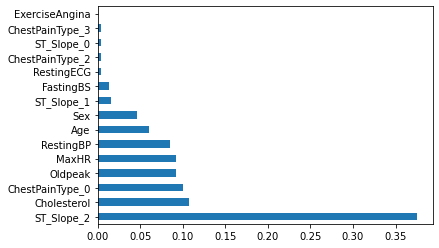

In [72]:


%matplotlib inline
feature_importances = pd.Series(dt.feature_importances_, index=x.columns)
feature_importances.nlargest(15).plot(kind='barh')

### Final Model:

In [73]:
#as per above evaluation matrix adboost give maximum accuracy also perform good in othe evaluation 
#parameter, so we select Adaboost as out final model

#with hyperparameter : 'n_estimators': 150, 'learning_rate': 0.3


## Model Deployement

### 1. train the model with 100% data

In [74]:
final_model=AdaBoostClassifier(n_estimators= 150, learning_rate= 0.3)

final_model.fit(x,y)



AdaBoostClassifier(learning_rate=0.3, n_estimators=150)

### 2. Save model as serilized file which can be store anywhere

In [75]:
import pickle
import os

with open('final_model.pkl','wb') as filewritestream:
    pickle.dump(final_model,filewritestream)
    filewritestream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\hp\Data Science\ML Practice\Heart_Failure_Prediction_Project


### 3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [76]:
def function_predict_result(input_data):
    
    #extracting no. of rows
    num_inputs=input_data.shape[0]
     
    # Generating the input values to the model
    x1=input_data[x.columns].values[0:num_inputs]
    
    
    # Loading the Function from pickle file
    with open('final_model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
    
    # Genrating Predictions
    Prediction=PredictionModel.predict(x1)
    PredictionResult=pd.DataFrame(Prediction, columns=['HeartDisease'])
    return(PredictionResult)

In [77]:
# Calling the function for HeartDisease predictions
NewSampleData=pd.DataFrame(data=[[0.244898,1,0.70,0.479270,0,0.0,0.867559,0,0.295455,0,1,0,0,0,0,1],
                                 [0.183673,1,0.65,0.469320,0,0.5,0.404163,0,0.295455,0,1,0,0,0,0,1]],
                            columns=x.columns)
print(NewSampleData)
# Calling the Function for prediction
function_predict_result(input_data= NewSampleData)

        Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG     MaxHR  \
0  0.244898    1       0.70      0.47927          0         0.0  0.867559   
1  0.183673    1       0.65      0.46932          0         0.5  0.404163   

   ExerciseAngina   Oldpeak  ChestPainType_0  ChestPainType_1  \
0               0  0.295455                0                1   
1               0  0.295455                0                1   

   ChestPainType_2  ChestPainType_3  ST_Slope_0  ST_Slope_1  ST_Slope_2  
0                0                0           0           0           1  
1                0                0           0           0           1  


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


,HeartDisease
0,0
1,0


In [78]:
x.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_0',
       'ChestPainType_1', 'ChestPainType_2', 'ChestPainType_3', 'ST_Slope_0',
       'ST_Slope_1', 'ST_Slope_2'],
      dtype='object')

## Deployment as an API

### Creating the model with few parameters

In [79]:
#creating funtion that can take input and do prediction

def prediction_from_api(Age, Sex, RestingBP, Cholesterol, FastingBS, RestingECG,
                           MaxHR, ExerciseAngina, Oldpeak, ChestPainType_0,
                           ChestPainType_1, ChestPainType_2, ChestPainType_3, ST_Slope_0,
                           ST_Slope_1, ST_Slope_2):
    input_data_frame=pd.DataFrame(data=[[Age, Sex, RestingBP, Cholesterol, FastingBS, RestingECG,
                                            MaxHR, ExerciseAngina, Oldpeak, ChestPainType_0,
                                            ChestPainType_1, ChestPainType_2, ChestPainType_3, ST_Slope_0,
                                               ST_Slope_1, ST_Slope_2]],
                                 columns=x.columns)
    predictions=function_predict_result(input_data_frame)
    
    return(predictions.to_json())
       

        
        

### creating flask API

In [81]:
from flask import Flask,request,jsonify

In [86]:
#top block
app = Flask(__name__)

#decoder
@app.route('/get_heart_die_prediction', methods=['GET'])

def get_heart_die_prediction():
    try:
        #getting parameter for API call
        Age_value=float(request.args.get('Age'))
        Sex_value=float(request.args.get('Sex'))
        RestingBP_value=float(request.args.get('RestingBP'))
        Cholesterol_value=float(request.args.get('Cholesterol'))
        FastingBS_value=float(request.args.get('FastingBS'))
        RestingECG_value=float(request.args.get('RestingECG'))
        MaxHR_value=float(request.args.get('MaxHR'))
        ExerciseAngina_value=float(request.args.get('ExerciseAngina'))
        Oldpeak_value=float(request.args.get('Oldpeak'))
        ChestPainType_0_value=float(request.args.get('ChestPainType_0'))
        ChestPainType_1_value=float(request.args.get('ChestPainType_1'))
        ChestPainType_2_value=float(request.args.get('ChestPainType_2'))
        ChestPainType_3_value=float(request.args.get('ChestPainType_3'))
        ST_Slope_0_value=float(request.args.get('ST_Slope_0'))
        ST_Slope_1_value=float(request.args.get('ST_Slope_1'))
        ST_Slope_2_value=float(request.args.get('ST_Slope_2'))
        
        prediction_api = prediction_from_api(Age=Age_value, 
                                             Sex=Sex_value, 
                                             RestingBP=RestingBP_value, 
                                             Cholesterol=Cholesterol_value, 
                                             FastingBS=FastingBS_value, 
                                             RestingECG=RestingECG_value,
                                             MaxHR=MaxHR_value, 
                                             ExerciseAngina=ExerciseAngina_value,
                                             Oldpeak=Oldpeak_value, 
                                             ChestPainType_0=ChestPainType_0_value,
                                             ChestPainType_1=ChestPainType_1_value, 
                                             ChestPainType_2=ChestPainType_2_value, 
                                             ChestPainType_3=ChestPainType_3_value, 
                                             ST_Slope_0=ST_Slope_0_value,
                                             ST_Slope_1=ST_Slope_1_value, 
                                             ST_Slope_2=ST_Slope_2_value)
        return (prediction_api)
    except Exception as e:
        return ('something not right')

### starting API engine

In [88]:
if __name__=='__main__':
    
    #hoisting API in local host
    app.run(port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
